

# Project: Investigate a Dataset (Tmdb Movies Data set)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



>The movie database(tmdb) is an records that contins about 10865 movies which contain information such as the id, imdb_id,popularity,budget,revenue,original title, cast, release_date,vote_count,vote_average,release_year,runtime,genres,director. The homepage,tangling,overview,production_companies are some of the additionanal information
some column contains multiple values separated with pipe(|), columns such as genres, cast,production_companies
At the last two column it contain the budget_adj,revenue_adj which represent the budget and revenue of the associated movie  in US Dollar base on inflation as at 2010

***
MOTIVE
***
From the data set we can solve some question, such as
>1. which genres are more popular from year to year?
>2. Does popularity of a movies affect the vote_counts
>3. What kind of properties associated with movies with high revenue
>4. Is there an increase in number of movies produce yearly
>5. Who are the top most director with high revenue
>6. who are the actor that perform in the most profitable movies
>7. what are most profitable movies base on budget and revenue
>8. what properties attached with genres with maximum vote_average

***
But I will like to answer the following base on my analysis
>1. which genres are more popular from year to year?
>2. Does popularity of a movies affect the vote_counts
>3. What kind of properties associated with movies with high revenue
>4. Which of the Genres generate high revenue
>5. Who are the top most director with high revenue
***

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [8]:
movie=pd.read_csv('tmdb-movie.csv')
print(movie.shape)
movie.head()

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [10]:
movie.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
movie.duplicated().sum()

1

In [12]:
movie.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [13]:
movie.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [14]:
movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [15]:
movie[movie['runtime']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0


In [16]:
movie[movie['budget']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00


In [17]:
movie[movie['revenue']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.0


### Issues spotted
> The data contains missing values

>Some of the columns are not necessaryly needed for analysis

>the data set contain one duplicate row

> two or more genre in genre column separated with pipe(|)

> zero value at runtime, budget,revenue columns this could propably be a data entry errors



### Data Cleaning 

#### Make a Copy and select the columns needed for the analysis

In [18]:
movie.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [19]:
movie_copy=movie.copy()
movie_copy=movie_copy[['id','popularity','budget','revenue', 'director','runtime','genres','production_companies','vote_count','vote_average','release_year']]

In [20]:
movie_copy.head()

,id,popularity,budget,revenue,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [21]:
# check for null value
movie_copy.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

#### Drop null values and duplicates

In [22]:
movie_copy.dropna(inplace=True)

In [23]:
movie_copy.drop_duplicates(inplace=True)

In [24]:
print('the number of duplicates in the data is',movie_copy.duplicated().sum())
movie_copy.isna().sum()

the number of duplicates in the data is 0


id                      0
popularity              0
budget                  0
revenue                 0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

### Define 
Remove the pipe at the genre column

In [25]:
movie_copy['genres'].sample()

10765    Drama|Romance
Name: genres, dtype: object

In [26]:
x=movie_copy['genres'][0]

In [27]:
x.split('|')[0]

'Action'

In [28]:
movie_copy['genres']=movie_copy['genres'].apply(lambda x: x.split('|')[0])
movie_copy['genres'].value_counts()

Drama              2225
Comedy             2084
Action             1479
Horror              853
Adventure           551
Thriller            474
Animation           362
Crime               361
Documentary         278
Fantasy             254
Science Fiction     196
Romance             161
Family              128
Mystery             118
Music                79
TV Movie             59
War                  57
Western              42
History              39
Foreign               6
Name: genres, dtype: int64

###  Define
Resolve the zero value at runtime budget and revenue columns. its advicable to use mean of each columns to replace zero

In [29]:
def rep_zero(col_name:list, data: pd.DataFrame):
    for name in col_name:
        for i in range(data.shape[0]):
            if(data[name].iloc[i]==0):
                data[name].iloc[i]= data[name].mean()
rep_zero(['revenue','budget','runtime'], movie_copy)


C:\Users\kafayat\AppData\Local\Temp\ipykernel_4888\2744961323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name].iloc[i]= data[name].mean()


In [30]:
movie_copy.query('(revenue == 0) or (budget == 0) or (runtime ==0) ')

,id,popularity,budget,revenue,director,runtime,genres,production_companies,vote_count,vote_average,release_year


In [31]:
movie_copy.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9806.000000,9806.000000,9.806000e+03,9.806000e+03,9806.000000,9806.000000,9806.000000,9806.000000
mean,63287.653783,0.693143,2.624596e+07,7.379787e+07,102.880634,238.622578,5.966459,2000.890271
std,90808.473021,1.035525,2.864169e+07,1.150251e+08,27.884381,602.081472,0.914291,13.032372
min,5.000000,0.000188,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,10247.500000,0.231581,1.622793e+07,3.540659e+07,90.000000,18.000000,5.400000,1994.000000
50%,18725.500000,0.418756,2.002389e+07,5.399185e+07,100.000000,46.000000,6.000000,2005.000000
75%,70586.750000,0.774231,2.500000e+07,6.771725e+07,112.000000,172.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis





### The top ten genres frequency

In [32]:
y=movie_copy['genres'].value_counts()[:10]
y_order=y.index
y.index

Index(['Drama', 'Comedy', 'Action', 'Horror', 'Adventure', 'Thriller',
       'Animation', 'Crime', 'Documentary', 'Fantasy'],
      dtype='object')

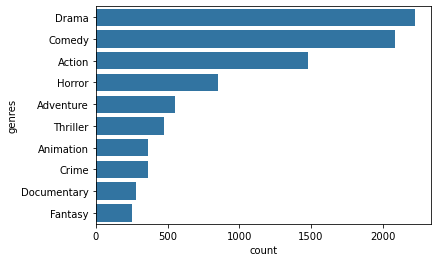

In [33]:
base_color=sb.color_palette()[0]
sb.countplot(data=movie_copy, y='genres', order=y_order, color=base_color);

Movies with Drama genres tends to be produce more with frequency over 2000

### The Average movies release by year

In [64]:
movie_copy['release_year'].describe()

count    9806.000000
mean     2000.890271
std        13.032372
min      1960.000000
25%      1994.000000
50%      2005.000000
75%      2011.000000
max      2015.000000
Name: release_year, dtype: float64

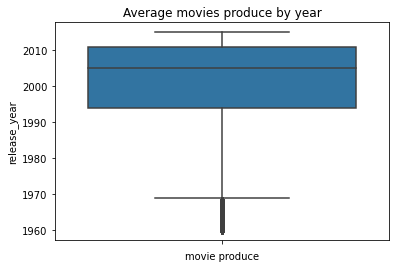

In [89]:
sb.boxplot(data=movie_copy,y='release_year');
plt.xlabel('movie produce')
plt.title('Average year movies produce by year');

The average year of movies produced is around 2008, and maximum year of movies produce is around 2015

#### 10 Years with the highest movie produce

In [81]:
movie_copy['release_year'].value_counts()[:10]


2014    638
2013    568
2015    561
2012    500
2009    474
2011    461
2008    443
2010    421
2007    392
2006    353
Name: release_year, dtype: int64

In [82]:
x_order=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]

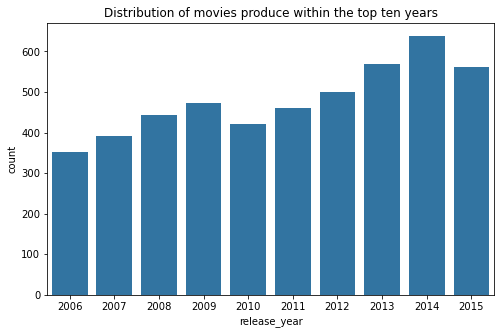

In [92]:
plt.figure(figsize=(8,5))
sb.countplot(data=movie_copy,x='release_year', order=x_order, color=base_color);
plt.title('Distribution of movies produce within the top ten years');

This explained it better the year with the highest movies release is 2014 and average movies is release in the year 2008

### Relationship between runtime and popularity

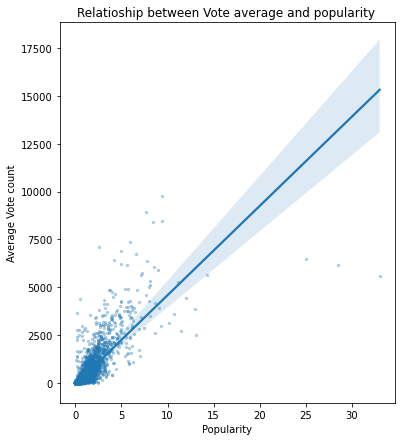

In [122]:
fig,ax=plt.subplots(1,1,figsize=(6,7))
ax=sb.regplot(data=movie_copy,x='popularity',y='vote_count', scatter_kws={'s':5,'alpha':.3});
ax.set(xlabel='Popularity', ylabel='Average Vote count', title='Relatioship between Vote average and popularity ');

The scatter plot indictated a psitive relationship between the popularity and vote counts. although there is high frequency value in movie popularity between 0-5 and 0-2500 vote counts but generally the two variable exhibit
a positive correlation

### let test correlation between the numerical values

In [111]:
num_var=['runtime','popularity','vote_average','revenue','budget','vote_count']


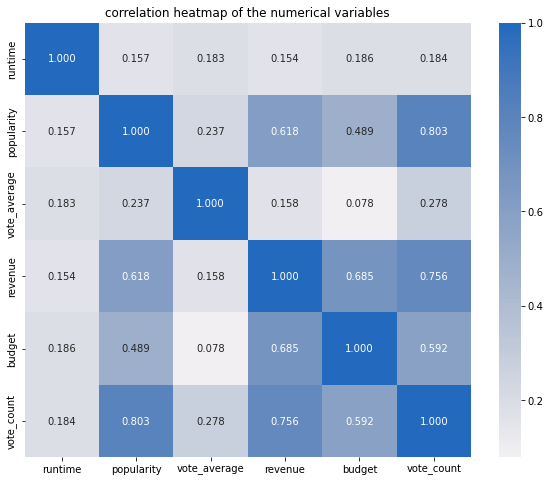

In [115]:
plt.figure(figsize=(10,8))
sb.heatmap(movie_copy[num_var].corr(), annot=True, fmt='.3f', cmap='vlag_r',center=0)
plt.title('correlation heatmap of the numerical variables');

In [118]:
sample=movie_copy.loc[np.random.choice(100, movie_copy.shape[0])]

In [119]:
sample.shape

(9806, 11)

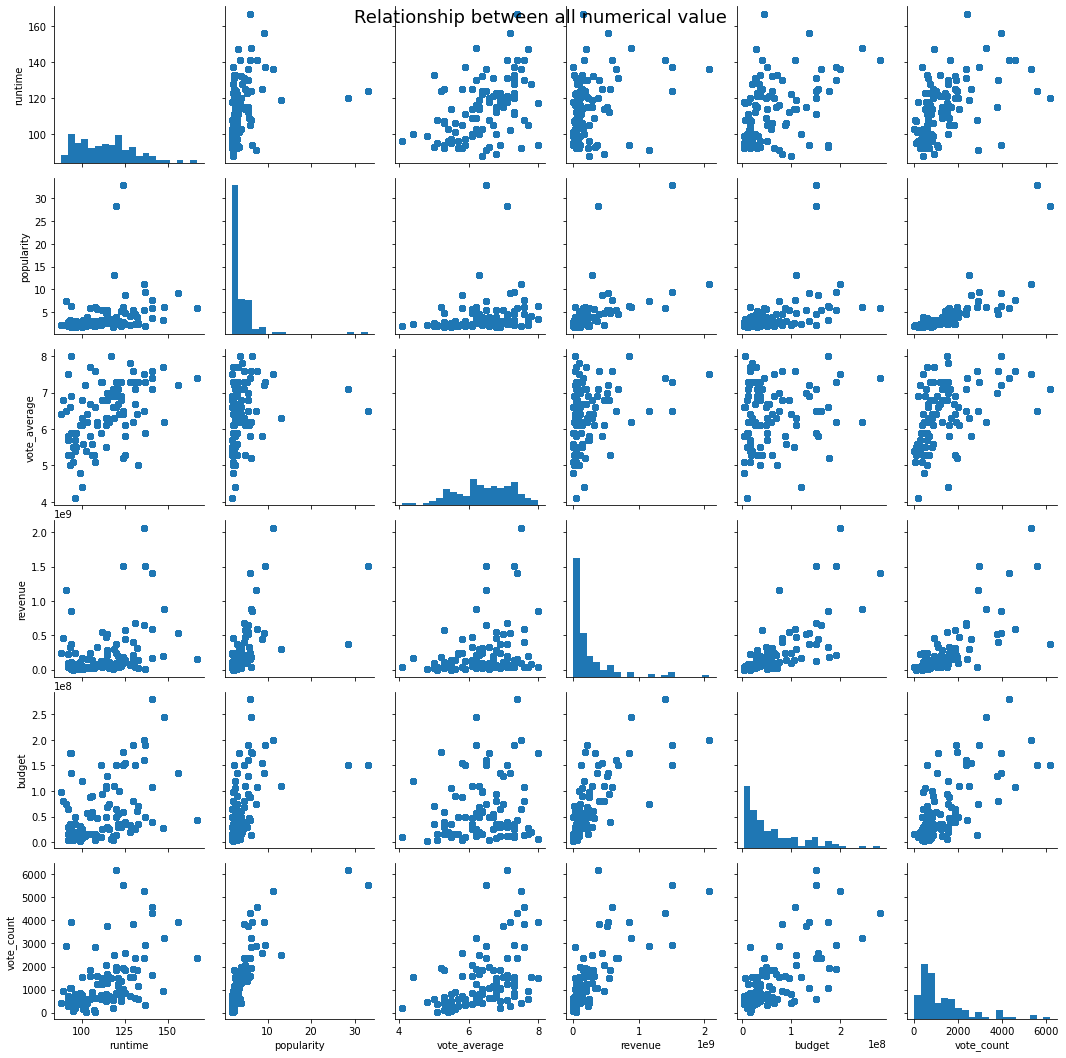

In [121]:
g=sb.PairGrid(data=sample, vars=num_var);
g=g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter)
g.fig.suptitle('Relationship between all numerical value',fontsize=18);

From The Correllation heat map and the Pair Grid it really shows that all the numerical columns are positively correlated. ie an increase in one value tend to increase the other value

In [123]:
movie_copy.sort_values(by='revenue',ascending=False, inplace=True)

## Check for the top ten directors that yield high revenue

In [134]:
directors=movie_copy.groupby('director')['revenue'].sum()
directors=directors.sort_values(ascending=False)[:10]
directors

director
Steven Spielberg     9.157483e+09
Peter Jackson        6.659921e+09
James Cameron        5.907240e+09
Michael Bay          4.917208e+09
Christopher Nolan    4.235019e+09
David Yates          4.154296e+09
Robert Zemeckis      4.008050e+09
Chris Columbus       3.966491e+09
Tim Burton           3.796451e+09
Ridley Scott         3.697655e+09
Name: revenue, dtype: float64

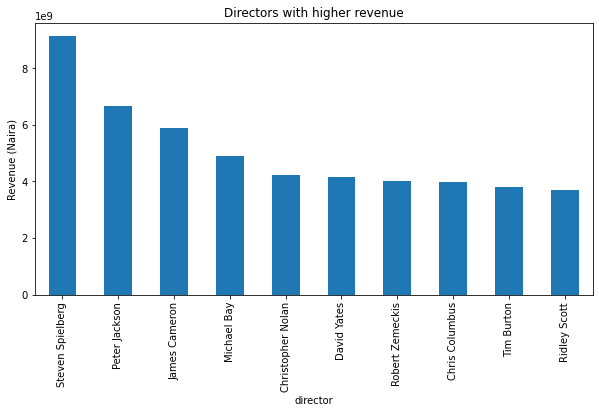

In [133]:
directors.plot(kind='bar', title='Directors with higher revenue',ylabel='Revenue (Naira)',figsize=(10,5));

The Director named Steven Spielberg Generate more revenue to the company

### The top ten Genres that yield high revenue

In [139]:
genres=movie_copy.groupby('genres')['revenue'].sum()
genres=genres.sort_values(ascending=False)[:10]
genres

genres
Action             1.356774e+11
Comedy             1.298730e+11
Drama              1.251953e+11
Adventure          8.497456e+10
Horror             4.582461e+10
Animation          4.244615e+10
Thriller           2.785250e+10
Fantasy            2.538887e+10
Science Fiction    2.227868e+10
Crime              2.183725e+10
Name: revenue, dtype: float64

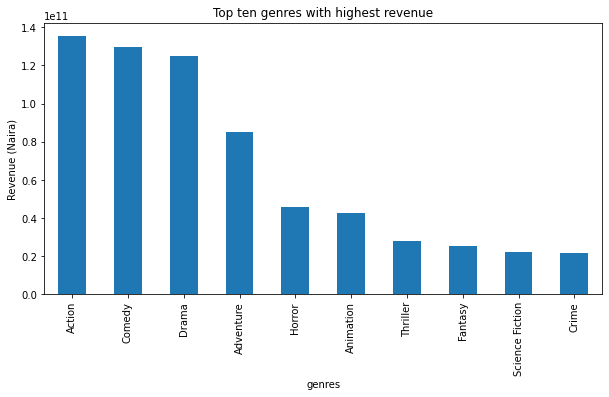

In [140]:
genres.plot(kind='bar', title='Top ten genres with highest revenue',ylabel='Revenue (Naira)', figsize=(10,5));

Fro the chart it is indicated that Action movies yield more revenue to the company More money should be invested in action movies

<a id='conclusions'></a>
## Conclusions
>1. Movies with the Drama genres has highest count
>2. The average year of movies produce is 2008 and number of movies increase year from 1960-2015, although 2014 tend to have high number of movies produce
>3. The correlation between popularity and vote count is positive
>4. All the numerical variable between the data set are positively correlleted ie an increase in one affect another
>5. Diretor with the name Steven Spielberg yield highest revenue to company
>6. Action movies generate highest revenue


***
### Limitation
>1. the data has alot of column that are not useful and nedded to be remove for better analysis
>2. The data has so many null and zero's 
>3. The data set has a great number of unique column
>4. some column values are separated with pipe e.g genres which later splited by explode method and this increase the number of rows available
***